# Making Business Decisions Based on Data


# Course project

### Introduction and table of content

<div class="alert alert-info"> 
    
For this project we are analysts at a big online store. 
    
Together with the marketing department, we have already compiled a list of hypotheses that may help boost revenue.
    
We are starting for sure with data download and preprocessing. 
    
During the project we need to prioritize these hypotheses. It is going to be the first part of our project. And after that in the second part we are going to analyze results of an A/B test, we have also got.
    
At we end we are going to draw a general conlusion and recommendations for our colleges from marketing department. 
    
</div>

#### Table of contents

0. [Step 0: Download the data and prepare it for analysis](#introduction)
    - [Step 0: Conclusion](#introduction1)   
1. [Part 1. Prioritizing Hypotheses](#part1)
    - [Part 1: Conclusion](#part11)  
2. [Part 2. A/B Test Analysis](#part2)
    - [Part 2: 1](#part21)
    - [Part 2: 2](#part22)
    - [Part 2: 3](#part23)
    - [Part 2: 4](#part24)
    - [Part 2: 5](#part25)
    - [Part 2: 6](#part26)
    - [Part 2: 7](#part27)
    - [Part 2: 8](#part28)
    - [Part 2: 9](#part29)
    - [Part 2: 10](#part210)
    - [Part 2: 11](#part211)
    - [Part 2: 12](#part212)
    - [Part 2: 13](#part213)  
    - [Part 2: Conclusion](#part222)  
3. [Step 3: General conclusion](#conclusion)


## Part 0. Data preproceccing
<a class="anchor" id="introduction"></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
#import seaborn as sns
#import plotly.express as px
#import plotly.graph_objects as go
from datetime import datetime

import scipy as sc

pd.set_option('max_colwidth', 400)

In [3]:
import warnings
warnings.filterwarnings('ignore')

It's our first project was made locally, we hope the paths can be read on your side too.

In [4]:
try:
    visits = pd.read_csv('visits_us.csv', nrows=500)
except:
    visits = pd.read_csv('/datasets/visits_us.csv', nrows=500)

In [6]:
visits.sample(10)

,date,group,visits
1,2019-08-02,A,619
57,2019-08-27,B,720
49,2019-08-19,B,487
16,2019-08-17,A,412
13,2019-08-14,A,735
59,2019-08-29,B,531
53,2019-08-23,B,546
48,2019-08-18,B,737
33,2019-08-03,B,509
12,2019-08-13,A,748


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


We can see in the output, how to optimize import of data: at least we can change some of datatypes, make values in _group_ column categorical. 

In [8]:
try:
    orders = pd.read_csv('orders_us.csv', nrows=500)
except:
    orders = pd.read_csv('/datasets/orders_us.csv', nrows=500)

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
transactionId    500 non-null int64
visitorId        500 non-null int64
date             500 non-null object
revenue          500 non-null float64
group            500 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 19.7+ KB


In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


We can see in the output, how to optimize import of data: at least we can change some of datatypes, make values in _group_ column categorical. 

In [10]:
try:
    hypotheses = pd.read_csv('hypotheses_us.csv', sep = ';', nrows=500)
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', nrows=500)

In [10]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
Hypothesis;Reach;Impact;Confidence;Effort    9 non-null object
dtypes: object(1)
memory usage: 200.0+ bytes


In [13]:
hypotheses.tail()

,Hypothesis;Reach;Impact;Confidence;Effort
4,Change the background color on the main page. This will increase user engagement;3;1;1;1
5,Add a customer review page. This will increase the number of orders;3;2;2;3
6,Show banners with current offers and sales on the main page. This will boost conversion;5;3;8;3
7,Add a subscription form to all the main pages. This will help you compile a mailing list;10;7;8;5
8,Launch a promotion that gives users discounts on their birthdays;1;9;9;5


And we can optimize memory used by this giant 488.0+ bytes dataset too:-) 

And as we first time run the code, we found out, that we need _sep = ';'_ parameter here. 

In [14]:
try:
    visit = pd.read_csv('visits_us.csv')
except:
     visit = pd.read_csv('/datasets/visits_us.csv')

In [13]:
visit.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Thу import above is just for comparison of memory usage. But we are lazy and are going to copmare the figures for dataset _visits_ only. 

In [15]:
try:
    vis = pd.read_csv('visits_us.csv',
                      dtype={'group': 'category'},
                  parse_dates=[ 'date'])
except:
     vis = pd.read_csv('/datasets/visits_us.csv',
                      dtype={'group': 'category'},
                  parse_dates=[ 'date'])

In [15]:
vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null category
visits    62 non-null int64
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.2 KB


In [16]:
try:
    ord = pd.read_csv('orders_us.csv',
                      dtype={'group': 'category'},
                  parse_dates=[ 'date'])
except:
     ord = pd.read_csv('/datasets/orders_us.csv',
                      dtype={'group': 'category'},
                  parse_dates=[ 'date'])

In [17]:
try:
    hyp = pd.read_csv('hypotheses_us.csv', sep = ';')
except:
     hyp = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')

In [18]:
vis.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
vis.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [21]:
ord.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [22]:
ord.revenue.max()

19920.4

In [23]:
ord.revenue.min()

5.0

In [20]:
hyp

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


Now we can optimize memory usage a bit more. 

In [25]:
vis.visits=vis.visits.astype('int16')

In [26]:
vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null category
visits    62 non-null int16
dtypes: category(1), datetime64[ns](1), int16(1)
memory usage: 826.0 bytes


We have also saved around 25% of memory without deleting any data (1.6 Kb -> 1.2 Kb). 

We can do the analogous modification of the both remaining datasets. 

In [22]:
ord = ord.rename(
    columns={'visitorId': 'uid', 'transactionId': 'tid'}
)

In [23]:
hyp.columns= hyp.columns.str.strip().str.lower()

In [24]:
hyp.reach = hyp.reach.astype('int16')

In [25]:
hyp.impact = hyp.impact.astype('int16')

In [26]:
hyp.confidence = hyp.confidence.astype('int16')

In [27]:
hyp.effort = hyp.effort.astype('int16')

In [33]:
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int16
impact        9 non-null int16
confidence    9 non-null int16
effort        9 non-null int16
dtypes: int16(4), object(1)
memory usage: 272.0+ bytes


488.0 -> 236.0+ bytes :-) 

Okay, let's do something more meaningful for this project. 

In [34]:
vis.duplicated().sum()

0

In [35]:
ord.duplicated().sum()

0

No duplicates is always good. 

In [36]:
vis.date.max()

Timestamp('2019-08-31 00:00:00')

In [37]:
vis.date.min()

Timestamp('2019-08-01 00:00:00')

In [38]:
ord.date.max()

Timestamp('2019-08-31 00:00:00')

In [39]:
ord.date.min()

Timestamp('2019-08-01 00:00:00')

The data in both datasets seems to be for the same time period, so we shouldn't do nothing about it. 

In [40]:
vis.sample(10)

,date,group,visits
22,2019-08-23,A,468
13,2019-08-14,A,735
32,2019-08-02,B,581
23,2019-08-24,A,395
3,2019-08-04,A,717
44,2019-08-14,B,746
17,2019-08-18,A,668
58,2019-08-28,B,654
31,2019-08-01,B,713
56,2019-08-26,B,676


In [41]:
ord.sample(10)

,tid,uid,date,revenue,group
982,3778147089,4243832526,2019-08-10,130.5,A
669,165288431,2162698752,2019-08-29,265.4,A
768,2102403691,2213855729,2019-08-21,40.2,B
1106,626262509,3791892006,2019-08-12,55.1,B
573,1887336629,6958315,2019-08-04,25.9,B
335,4006427057,612505725,2019-08-25,20.2,A
1157,3716304192,2695379936,2019-08-14,10.1,A
577,3932236947,2038680547,2019-08-04,45.1,B
433,3312757456,994339272,2019-08-24,90.8,A
510,2092376102,1879028067,2019-08-06,30.4,B


We have a hint in the task, that some users can be in both groups. It can be in the _ord_ dataset only (the other two contains no user IDs, so we can not check this kind of information)

In [28]:
black_list = ord.groupby(['uid'])['group'].nunique().reset_index().query('group>1')

In [29]:
len(black_list)

58

We have to get rid of this users, because it makes no sence to keep this data in our dataset, it'd affect our further calculations/analysis. 

In [44]:
len(ord)

1197

In [30]:
ord = ord[~ord['uid'].isin(black_list['uid'])]

In [46]:
len(ord)

1016

81 rows are gone. That means, some of 58 users had more than one order. 

It is also not really kosher, that we can not filter _vis_ dataset too - the data there is already aggregated. The containing incorrect information may cause some distortions in our further analysis. 

In real life we would talk with a person who provided the data, in this educational project we just go ahead. 

### Part 0. Conclusion
<a class="anchor" id="introduction1"></a>

During this step we prepared the data for analysis: we imported the datasets optimizing the datatypes as far as it was possible during the import and after it. We also checked the datasets for duplicates and missing values. Finally we get rid of some corrupted data we had in _ord_ dataset 

## Part 1. Prioritizing Hypotheses
<a class="anchor" id="part1"></a>

_Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority._

In [47]:
hyp

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [31]:
hyp['ICE'] = (hyp['impact'] * hyp['confidence']) / hyp['effort'] 

In [32]:
print(hyp[["hypothesis", "ICE"]].sort_values(by= "ICE", ascending= False))

                                                                                                               hypothesis  \
8                                                        Launch a promotion that gives users discounts on their birthdays   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
1                                                       Launch your own delivery service. This will shorten delivery time   
5                                                     Add a customer review page. This will increase the number of orders   


In [33]:
hyp['RICE'] = (hyp['reach'] *hyp['impact'] * hyp['confidence']) / hyp['effort'] 

In [34]:
print(hyp[["hypothesis", "RICE"]].sort_values(by= "RICE", ascending= False))

                                                                                                               hypothesis  \
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
8                                                        Launch a promotion that gives users discounts on their birthdays   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
1                                                       Launch your own delivery service. This will shorten delivery time   


As we know, the only difference in the formulas is the _reach_ parameter in the numerator. As a consequence, the hypoteses with biggest _reach_ parameter moved on the top places in the 2nd case. 

### Part 1. Conclusion
<a class="anchor" id="part11"></a>

During this short step we have sorted the hypoteses using ICE/RICE ways of prioritizing problems. We know the hypoteses that should be tested at the first place if we'll have not enough resources to test them all. 

## Part 2. A/B Test Analysis
<a class="anchor" id="part2"></a>

_1. Graph cumulative revenue by group. Make conclusions and conjectures._
<a class="anchor" id="part21"></a>

Let's calculate cumulative revenue at first. 

In [52]:
ord

,tid,uid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [43]:
# building an array with unique paired date-group values 
datesGroups = ord[['date','group']].drop_duplicates() 
datesGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Unfortunately the following code does not work if the _group_ column saved as categorucal value, so we had to save it again as strings.

In [44]:
ord.group = ord.group.astype(str)

In [45]:
vis.group = vis.group.astype(str)

In [46]:
ordersAggregated = datesGroups.apply(
    lambda x: ord[np.logical_and(ord['date'] <= x['date'], ord['group'] == x['group'])].agg(
        {'date' : 'max', 
         'group' : 'max',
         'tid' : pd.Series.nunique, 
         'uid' : pd.Series.nunique, 
         'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

We are collecting the aggregated cumulative daily data on orders in several steps here. 
    
In the first part of the code, we get the rows of the _ord_ table where the date is less than or equal to the date of the _datesGroups_ element and the test group is the same as in _datesGroups_:it's as if we've been calculating the results of our test every day up to the current date and storing them in the rows of the _ordersAggregated_ table.
    
After that we aggregating values. We find the maximum date. We'll find the maximum value for the group, too, so that we have the _group_ column in our final output. We find the number of unique order and user IDs and calculate the sum of average purchase sizes. 
    
We are applying the methods to each row of the DataFrame _(apply(axix=1))_ and sort the results by the columns _date_ and _group_. 
    
Thus we've been calculating the results of our test every day up and storing them in the rows of the _ordersAggregated_ table.

In [41]:
ordersAggregated.head()

,date,group,tid,uid,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [58]:
ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
tid        1016 non-null int64
uid        1016 non-null int64
date       1016 non-null datetime64[ns]
revenue    1016 non-null float64
group      1016 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


In [47]:
visitorsAggregated = datesGroups.apply(
    lambda x: vis[np.logical_and(vis['date'] <= x['date'], vis['group'] == x['group'])].agg(
        {'date' : 'max', 
         'group' : 'max', 
         'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

Here we collecting the aggregated cumulative daily data on visits in analogue way (as we handled orders above).

In [48]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845


We are merging two tables. 

In [49]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

We are creating two DFs with cumulative orders and cumulative revenue by day.

And now we can plot the graph. 

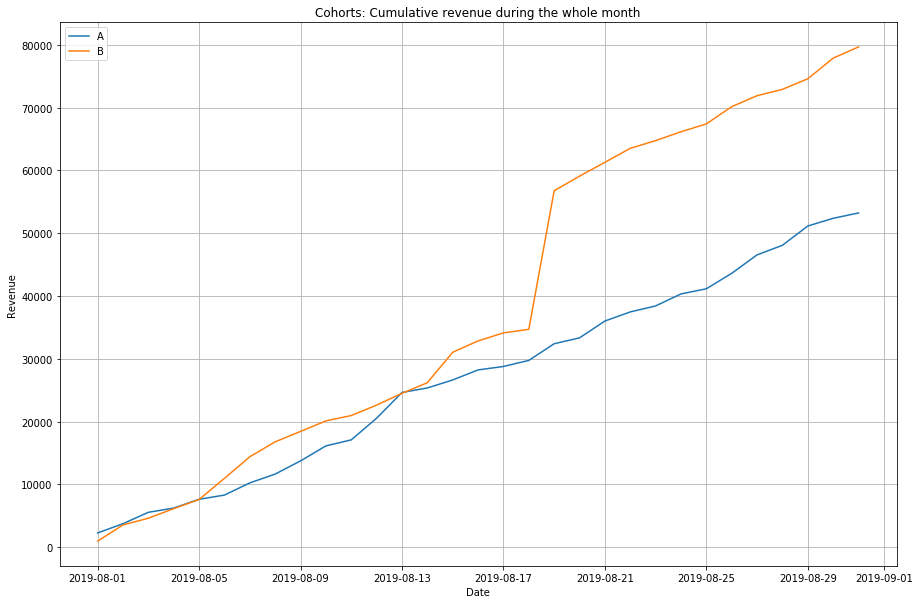

In [50]:
plt.rcParams["figure.figsize"] = (15,10)

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Cohorts: Cumulative revenue during the whole month')
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid()

plt.legend();

Revenue is rising steadily throughout the whole test. That's a good sign. 

However, we can see that B grous  has a huge spike in revenue in the middle of the test. This may imply either a surge in the number of orders or (more likely becausу the line at this on this segment is straight) the presence of very expensive order(s) in the sample. 

We should check the outliers later. 

2. _Graph cumulative average order size by group. Make conclusions and conjectures._

<a class="anchor" id="part22"></a>

We already have the data to plot this graph: 

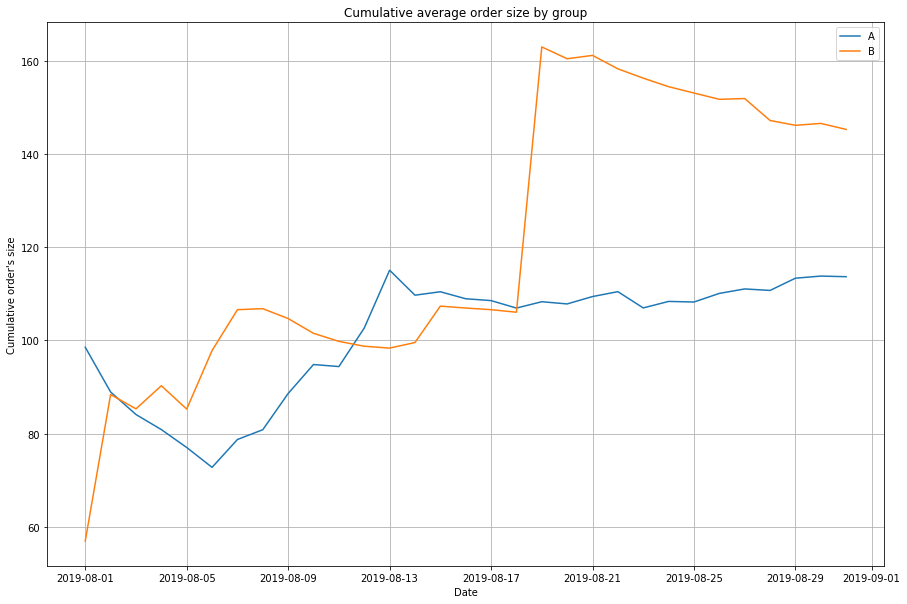

In [51]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Cumulative average order size by group')
plt.xlabel("Date")
plt.ylabel("Cumulative order's size")
plt.grid()

plt.legend() ;

Here we see a confirmation, that we have an obvious outlier in the group B (on 2019-08-18). We have to remove it,  because this data would noticeable affect our further analysis. 

It is also important to pay attention that the average putchase size stabilize for group A beginning on 2019-08-4. And the identical indicator for the group B falling in the 2nd half of the month. (But the situation can change after removing the outliers!)

3. _Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures._

<a class="anchor" id="part23"></a>

Let's merge the data into one DF. 

In [52]:

mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=
    ['A', 'B'])

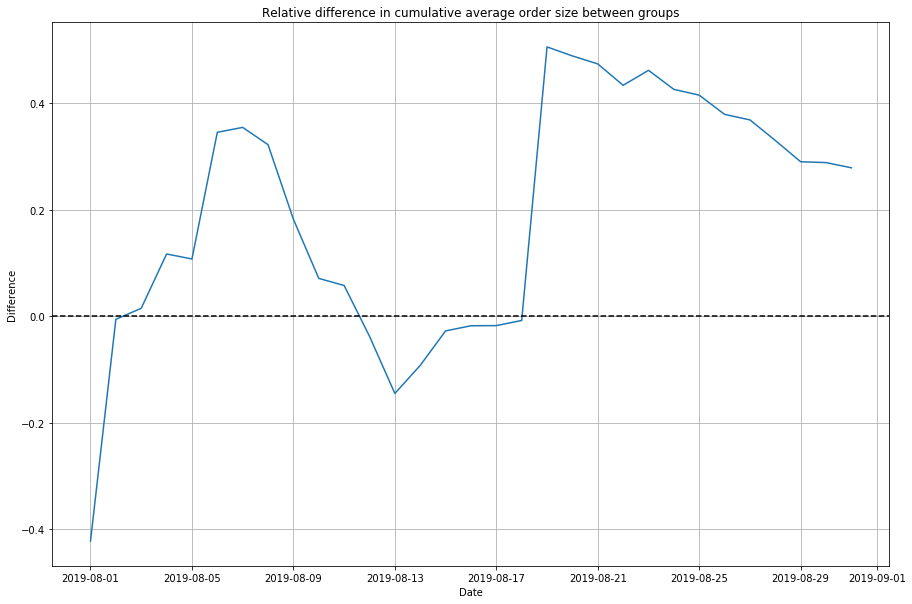

In [53]:
# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Relative difference in cumulative average order size between groups')
plt.xlabel("Date")
plt.ylabel("Difference")
plt.grid()

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--');

As we can see on the graph, at several points the difference between the segments spikes. This means there must be some big orders and outliers. 

4. _Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.._

<a class="anchor" id="part24"></a>

In [54]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

['2019-08-01', '2019-08-31', 0.02, 0.04]

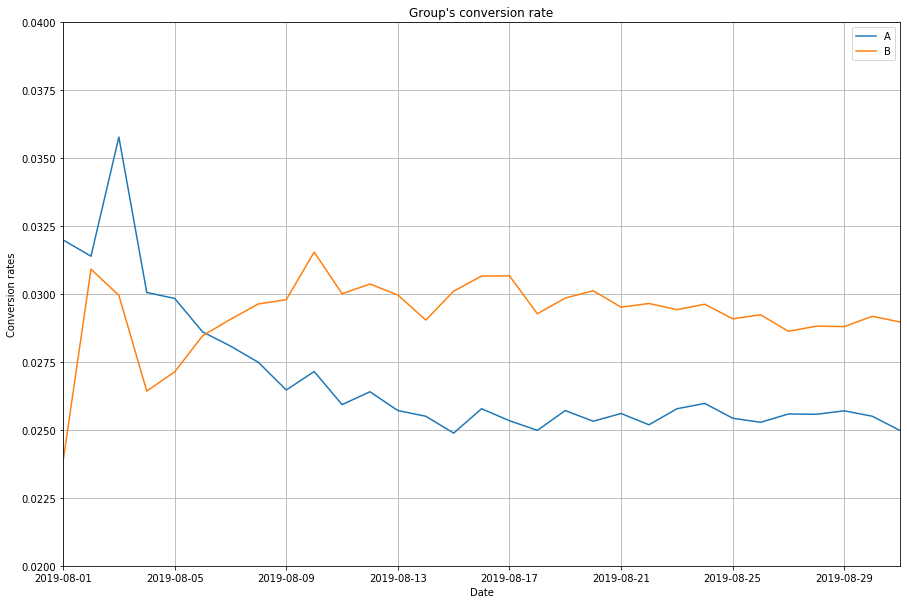

In [55]:
# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.title('Group\'s conversion rate')
plt.xlabel("Date")
plt.ylabel("Conversion rates")
plt.grid()

# setting the axes' scale
plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.04])

The groups seems to be fluctuating around the same value, but then the conversion rate of group A rose before stabilizing, while the conversion rate of group B dropped but then stabilized too.

Let's plot a relative difference graph for the cumulative conversion rates:

['2019-08-01', '2019-08-31', -0.25, 0.25]

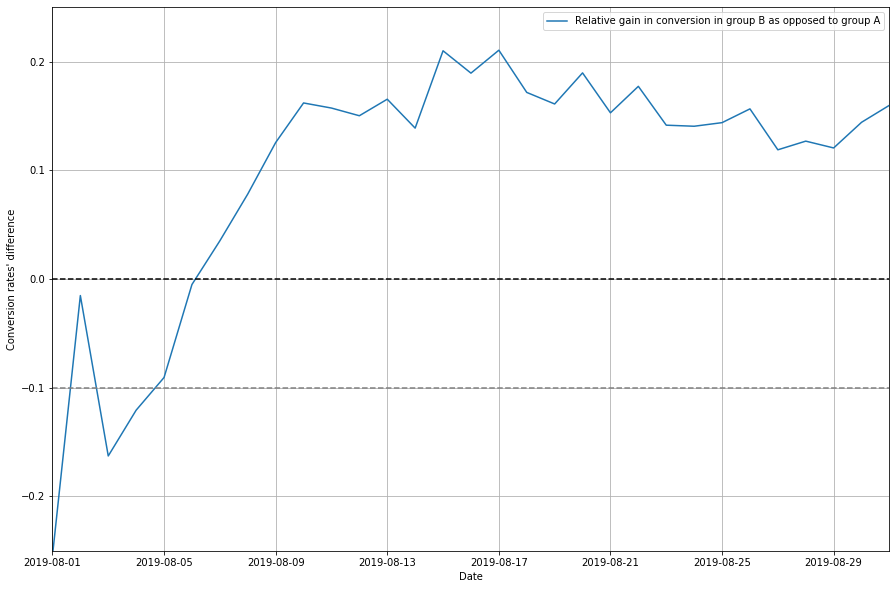

In [57]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.legend()


plt.xlabel("Date")
plt.ylabel("Conversion rates\' difference")
plt.grid()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.25, 0.25])

At the beginning of the test, group B was lagging behind noticeably, but then it suddenly took the lead and stabily remains ahead.  

In general, the conversion ratio is relativly stable since 2019-08-09.

In any case, first we should have a look at the anomalies; they might change the picture in some way. 

5. _Plot a scatter chart of the number of orders per user. Make conclusions and conjectures._

<a class="anchor" id="part25"></a>

We have to preprocess our data at first. 

We are going to create a table with the columns we are need for the further calculations only grouping by unique user ID here. 

In [59]:
ordersByUsers = (
    ord.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('uid', as_index=False)
    .agg({'tid': pd.Series.nunique})
)

ordersByUsers.columns = ['uid', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
 

            uid  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


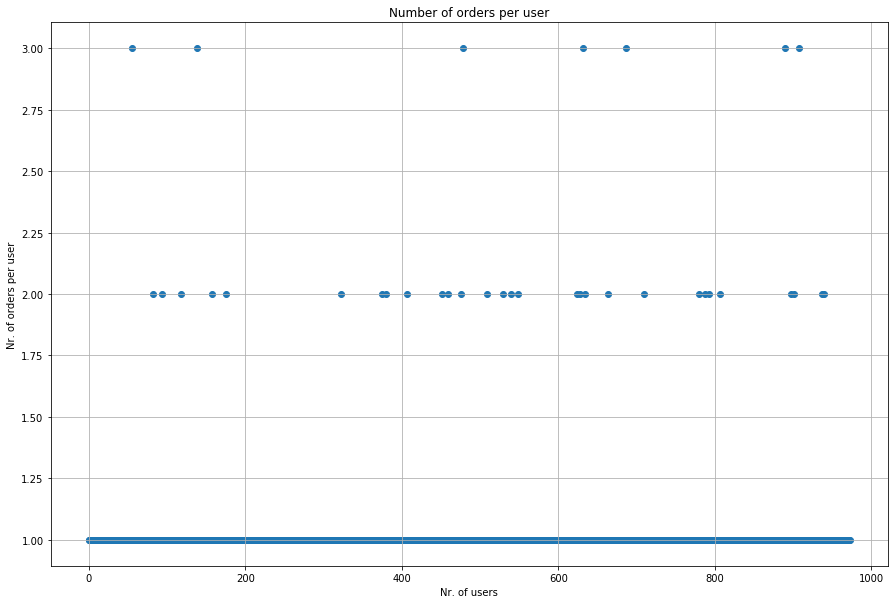

In [60]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.title('Number of orders per user')
plt.xlabel("Nr. of users")
plt.ylabel("Nr. of orders per user")
plt.grid()

plt.scatter(x_values, ordersByUsers['orders']);

We can see on the graph and in previous output, only 8 users made 3 purchases each, a little bit more users made 2 purchases each, but all of the other users made only 1 purchase per user. 

6. _Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly._

<a class="anchor" id="part25"></a>

In [72]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Not more than 1% of users made more than 2 purchases. Thus, it would be reasonable to set two orders per user as the lower limit for the number of orders and to filter 8 anomalies we have on that basis. 

7. _Plot a scatter chart of order prices. Make conclusions and conjectures._

<a class="anchor" id="part27"></a>

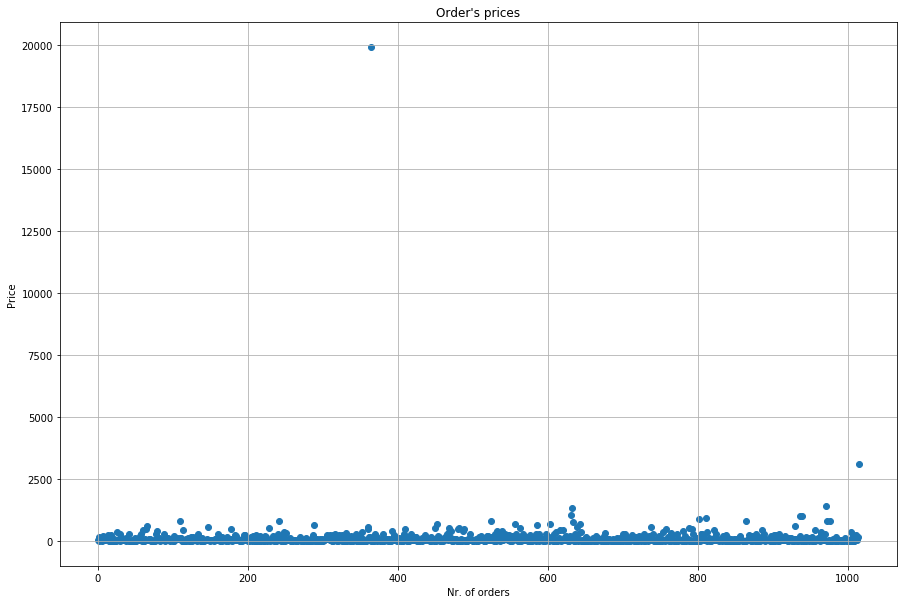

In [61]:
x_values = pd.Series(range(0, len(ord['revenue'])))

plt.title('Order\'s prices')
plt.xlabel("Nr. of orders")
plt.ylabel("Price")
plt.grid()


plt.scatter(x_values, ord['revenue']);

We can see only two really outliers with order size more than 2500. The size of the other purchases was significantly smaller. 

8. _Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly._

<a class="anchor" id="part28"></a>

In [74]:
np.percentile(ord['revenue'], [95, 99])

array([414.275, 830.3  ])

Not more than 5% of orders cost more than 414 (dollars?), and not more than 1% cost more than 830. We would say, all the purchases wich cost more than 830 are abnormaly high. 

9. _Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures._

<a class="anchor" id="part29"></a>

We have to prepare the data at first. 

In [63]:
ordersByUsersA = ord[ord['group']=='A'].groupby('uid', as_index=False).agg({'tid' : pd.Series.nunique})
ordersByUsersA.columns = ['uid', 'orders']

ordersByUsersB = ord[ord['group']=='B'].groupby('uid', as_index=False).agg({'tid' : pd.Series.nunique})
ordersByUsersB.columns = ['uid', 'orders']

We are creating two tables with grouped order data.  

In [64]:
ordersByUsersA.head()

,uid,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [77]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(vis[vis['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(vis[vis['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [78]:
len(sampleA)

18736

In [79]:
len(sampleB)

18916

<div class="alert alert-info"> 
    
Our null hypothesis is "There's not a statistically significant difference in conversion between the groups A and B."
    
Our alternative hypothesis is "There is a statistically significant difference in conversion between the groups A and B."   
    
We use 0.05 alpha significance level. 
    
</div>



In [80]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.006
0.160


Conclusion: based on the raw data, there is a difference between groups A and B.
The first row of the output gives us the p-value, 0.006, which is much smaller than 0.05. So we can reject the null hypothesis that there's not a statistically significant difference in conversion between the groups. The relative loss of group A is 16% (the second row of the output).

10. _Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures._

<a class="anchor" id="part210"></a>

To calculate the statistical significance of the difference in the segments' average order size, we'll pass the data on revenue to the _mannwhitneyu()_ criterion.
We'll also find the relative difference in average order size between the groups:

<div class="alert alert-info"> 
        
Our null hypothesis is "There's not a statistically significant difference in average order size between the groups A and B."
    
Our alternative hypothesis is "There is a statistically significant difference in average order size between the groups A and B."   
    
We use 0.05 alpha significance level. 
    
</div>

In [81]:
print('{0:.3f}'.format(stats.mannwhitneyu(ord[ord['group']=='A']['revenue'], ord[ord['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(ord[ord['group']=='B']['revenue'].mean()/ord[ord['group']=='A']['revenue'].mean()-1))

0.431
0.278


The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. Nonetheless, the average order size for group A is much bigger than it is for group A. (We are still using the raw data here!)

11. _Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures._

<a class="anchor" id="part211"></a>

And now we are going to filter outliers out. 

Let's define anomalous users as those who place more than 2 orders or one with the order size bigger than 2,500. Thus we'll remove very few users with the largest numbers of orders and two most expensive orders. 

Let's make data slices with the users who placed more than two orders and the users who placed orders for more than 2,500. We'll join them in a table called _abnormalUsers_.

Let's find the total number of anomalous users using the shape() method.

In [65]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['uid'], ordersByUsersB[ordersByUsersB['orders'] > 2]['uid']], axis = 0)
usersWithExpensiveOrders = ord[ord['revenue'] > 2500]['uid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(10))
print(abnormalUsers.shape)

33       249864742
58       611059232
425     1920142716
1196    2108080724
211     2108163459
347     2742574263
310     2988190573
409     3908431265
416     3967698036
Name: uid, dtype: int64
(9,)


So we have only 9 abnormal users  in total. But we assume, that this very small amount of outliers. Nevertheless it affects our calculations. Let's get rid of this abnormality :-)

In [69]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['uid'].isin(abnormalUsers))]\
     ['orders'],pd.Series(0, index=np.arange(vis[vis['group']=='A']\
    ['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['uid'].isin(abnormalUsers))]\
     ['orders'],pd.Series(0, index=np.arange(vis[vis['group']=='B']\
['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

<div class="alert alert-info"> 
    
Our null hypothesis is "There's not a statistically significant difference in conversion between the groups A and B."
    
Our alternative hypothesis is "There is a statistically significant difference in conversion between the groups A and B."   
    
We use 0.05 alpha significance level. 
    
</div>

Let's apply the statistical Mann-Whitney criterion to the resulting samples:

In [70]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.005
0.181


The results for conversion almost didn't change. Let's see what happens to the values for average order size.

12. _Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures._

<a class="anchor" id="part212"></a>

<div class="alert alert-info"> 
    
Our null hypothesis is "There's not a statistically significant difference in average order size between the groups A and B."
    
Our alternative hypothesis is "There is a statistically significant difference in average order size between the groups A and B."   
    
We use 0.05 alpha significance level. 
    
</div>



In [85]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    ord[np.logical_and(
        ord['group']=='A',
        np.logical_not(ord['uid'].isin(abnormalUsers)))]['revenue'],
    ord[np.logical_and(
        ord['group']=='B',
        np.logical_not(ord['uid'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    ord[np.logical_and(ord['group']=='B',np.logical_not(ord['uid'].isin(abnormalUsers)))]['revenue'].mean()/
    ord[np.logical_and(
        ord['group']=='A',
        np.logical_not(ord['uid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.354
-0.089


The p-value decreased, but now the difference between the segments is almost 9% instead of 29%. 

Although our general conclusions from the test didn't change, this example demonstrates clearly that anomalies can affect A/B test results. 

13. _Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test._

<a class="anchor" id="part213"></a>

It's a bit difficult to say, because we do not really have expirience with A/B tests, but in this case we would say, "Stop the test, consider one of the groups the leader" is the best option in this case. The group B is the clear leader in conversion and average order size even if we filter out the outliers from our data. 

## Part 3. General conclusion
<a class="anchor" id="conclusion"></a>

As an analyst at a big online store we got a list of hypotheses that may help boost revenue. We sorted the hypotesis using ICE/RICE ways of prioritizing problems. We found out the hypoteses that should be tested at the first place if we'll have not enough resources to test them all.

We also analyzed the results of an A/B test, we checked the key marketing indicators like cumulative revenue, ordewr size, relative difference in cumulative average order size for both groups, conversion rate, number of orders per user; we found the statistical significance of an average order size and of of the difference in conversion between the groups using the raw andthe filtered data. 

We ploted the gathered data on the graphs and draw the conlusion, that the test was successful, the performance of the group B was higher and we can stop the test. 